<a href="https://colab.research.google.com/github/araujoroberts/Proyectos/blob/main/Orbita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving gordi1.jpeg to gordi1 (4).jpeg
Saving gordi2.jpeg to gordi2 (3).jpeg
Saving reff.jpg to reff (1).jpg


#Powered flight portion

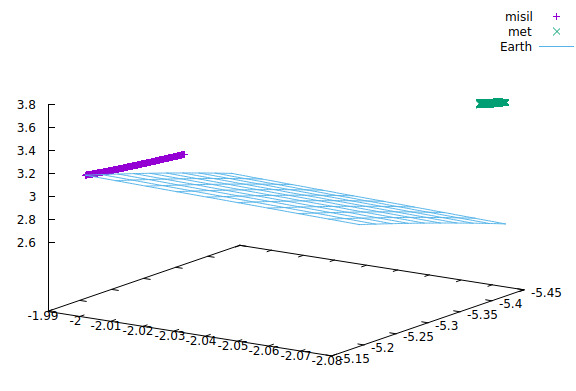

In [129]:
Image('gordi1.jpeg' ,width=700)    

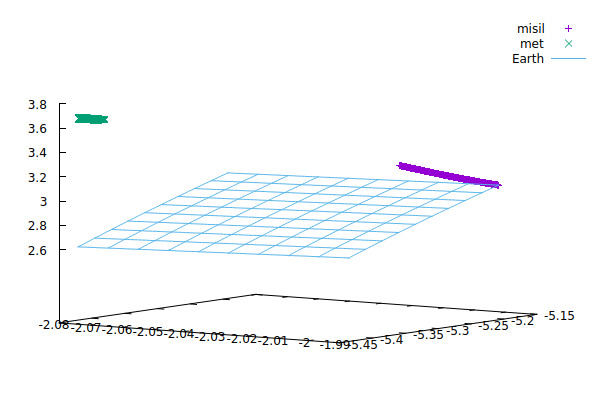

In [130]:
Image('gordi2.jpeg' , width=700)

Now we'll se the distances to the Earth center of the misil and the meteorite

In [131]:
uploaded = files.upload()

Saving distancias.jpeg to distancias.jpeg
Saving radios.jpeg to radios.jpeg


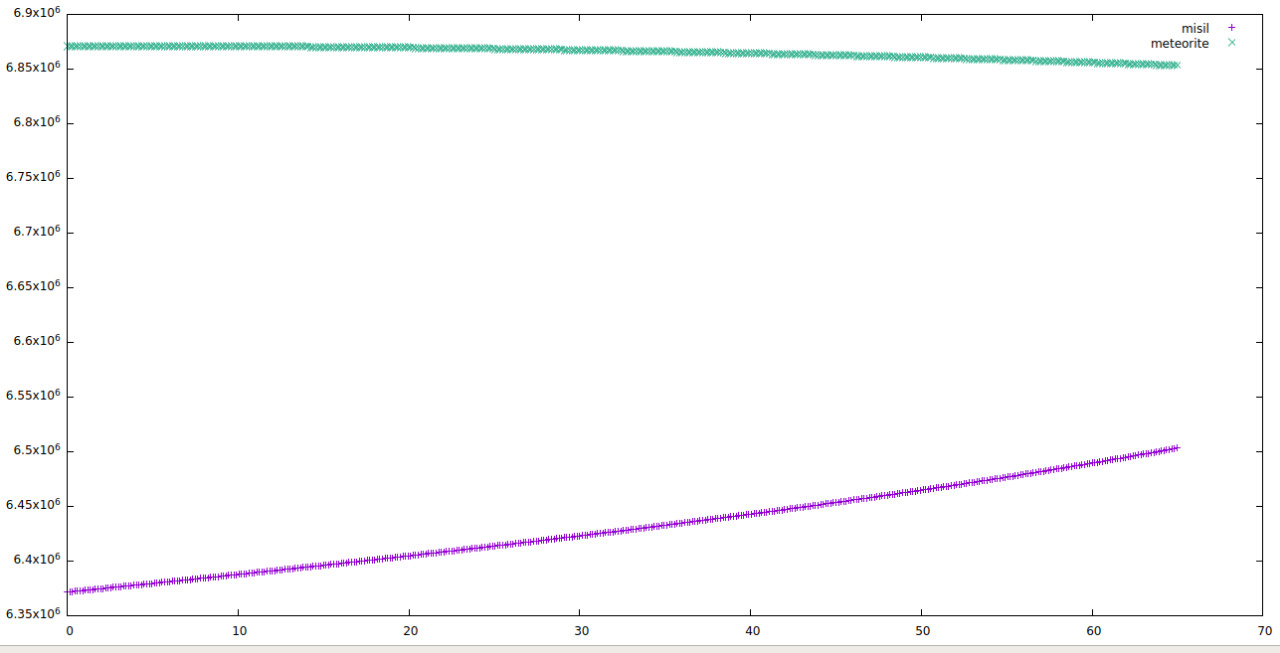

In [137]:
Image('radios.jpeg' , width=1200)

The relative distance between them is shown below

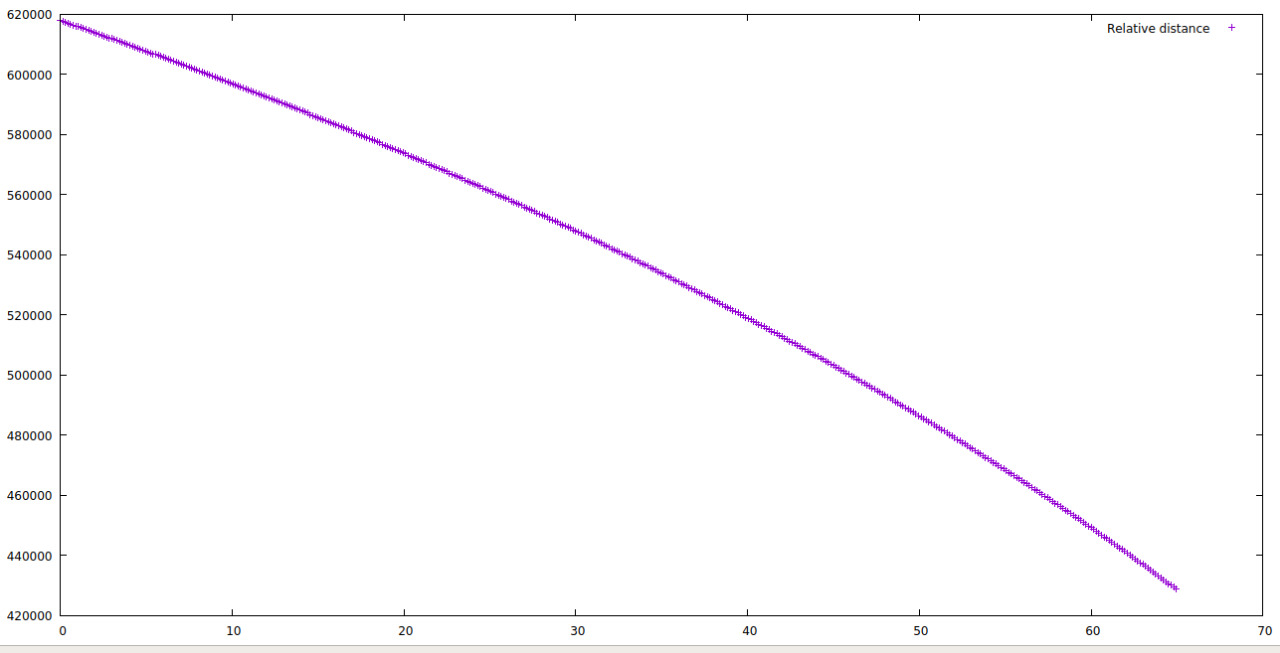

In [136]:
Image('distancias.jpeg' , width=1200)

# Change of reference frame

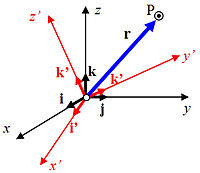

In [126]:
Image('reff.jpg' , width=500)


When finishing the rocket fuel, the rocket turns into a particle in free falling or rather, along with the Earth, a two-bodies problem.

The moment the fuel runs out, the two-bodies problem initial conditions are

$$
\vec{r}_0=( -2.01223660 , -5.25328541 , 3.26207399 ) \ \ \ [m\times\ 10^6]
$$

&

$$
\vec{v}_0=(-0.000416016614,-0.00110002805,0.00367545220) \ \ \ [m/s\ \times 10^6 ]
$$

This will be used for the orbit equation, however, these still have 3 degrees of freedom whereas the orbit equation has only two. Now we will do a change of base to solve this problem in one in which the misil path is perform on a plane.


We'll choose this plane as the one formed by the position vectors of "Arizona University" and "Universidad de Sonora" these are:

$$
\vec{r}_{AU}=( -2.07859778 , -5.42790127 , 3.66441727 )\ \ \  [m \times 10^6]
$$

$$
\vec{r}_{US}=(-1.99180055,-5.19931936,3.09668303) \ \ \ [m\times\ 10^6]
$$

When we perform the cross product between these two vectors we obtain a third orthogonal vector which we'll call $\vec{v}_2$. Renaming $\vec{r}_{US}$ as $\vec{v}_1$ and doing the product $\vec{v}_1 \times \vec{v}_2$ we obtain a forth vector that is orthogonal both to $\vec{v}_1$ as $\vec{v}_2$. Dividing by the length of each one we already have the orthonormal base and this is:

$$
i'=(-0.312635481,-0.816091597,0.486059189)
$$

$$
j'=(-0.175660208,-0.453210562,-0.873924255)
$$

$$
k'=(-0.933489382,0.358601093,0.00166505377)
$$



All these in [$m\times 10^6$].

In order to do the change of base we take advantage of the property which tells us that every vector can be expressed as a multiplication of another vector times its base matrix, and this must be the same in every coordinate system, thus:

\begin{equation}
\begin{pmatrix}
-0.312635481 & -0.933489382 & -0.175660208\\
0.486059189 & 0.00166505377 & -0.873924255\\
-0.816091597 & 0.358601093 & -0.453210562
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
-2.01223660\\
-5.25328541\\
3.26207399
\end{pmatrix}
\end{equation}

This has the form:
$$
\mathbb M \cdot \vec{r}_0\ '=\mathbb I \cdot \vec{r}_0
$$
So we only have to invert the matrix $\mathbb M$ to obtain the initial condition in the new base.
$$
\vec{r}_0\ '=\mathbb M ^{-1} \cdot \vec{r}_0
$$

In [127]:
import numpy as np
import math

M=np.array([ [-0.312635481,-0.175660208,-0.933489382],
             [-0.816091597,-0.453210562,0.358601093],
             [0.486059189,-0.873924255,0.00166505377] ])

r0=np.array([ [-2.01223660],[-5.25328541],[3.26207399] ]) #Column vector
r1=np.array([-2.01223660,-5.25328541,3.26207399])         # Row vector

r__=np.linalg.solve(M,r1.T)
print('The vector r0\' turns out')
print('----------------------------')
print(np.linalg.solve(M,r0))

The vector r0' turns out
----------------------------
[[ 6.50181985e+00]
 [-1.16491454e-01]
 [-6.70253689e-08]]


As we can see the third vector component is quite small, as it was supposed it should be, so we can consider the initial vector position in the new reference frame as:

$$
\vec{r}_0\ '=(\ 6.50181985\ ,\ -0.116491455\ ,\ 0\ )
$$

Now we can say the movement is given in a plane.


Now, doing the same with the velocity $\vec{v}_0$

$$
\mathbb M \cdot \vec{v}_0\ '=\mathbb I \cdot \vec{v}_0
$$

This is:

\begin{equation}
\begin{pmatrix}
-0.312635481 & -0.933489382 & -0.175660208\\
0.486059189 & 0.00166505377 & -0.873924255\\
-0.816091597 & 0.358601093 & -0.453210562
\end{pmatrix}
\begin{pmatrix}
v_x \\
v_y \\
v_z
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
-0.00416016614\\
-0.0110002805\\
0.0367545220
\end{pmatrix}
\end{equation}

The only thing left is

$$
\vec{v}_0\ '=\mathbb M ^{-1} \cdot \vec{v}_0
$$


In [76]:
M=np.array([ [-0.312635481,-0.175660208,-0.933489382],
             [-0.816091597,-0.453210562,0.358601093],
             [0.486059189,-0.873924255,0.00166505377] ])

v0=np.array([ [-0.000416016614],[-0.00110002805],[0.00367545220] ]) # Column vector
v1=np.array([-0.000416016614,-0.00110002805,0.00367545220])         # Row vector
v2=np.linalg.solve(M,v1.T)

print('The vector v0\' turns out')
print('----------------------------')
print(np.linalg.solve(M,v0))

The vector v0' turns out
----------------------------
[[ 2.81427267e-03]
 [-2.64044521e-03]
 [-3.98633193e-09]]


Again, we get a vector with a third component very close zero, so we can approximate it by:

$$
\vec{v}_0\ '=(\ 0.00281427270\ ,\ -0.00264044521\ ,\ 0\ )
$$

What we've gotten is two vectors $\ \vec{r}_0\ '\ $ and $\ \vec{v}_0\ '\ $ whose third component is zero, and as we're on the way to use the orbit equation which is actually in 2D we're interested in lowering the problem one dimension. 

$$
\vec{r}_0\ '=(\ 6.50181985\ ,\ -0.116491455\ ,\ 0\ ) \ \ \ \ \rightarrow \ \ \ \ \vec{r}_0\ '=(\ 6.50181985\ ,\ -0.116491455\  )
$$

$$
\vec{v}_0\ '=(\ 0.00281427270\ ,\ -0.00264044521\ ,\ 0\ ) \ \ \ \ \rightarrow \ \ \ \ \vec{v}_0\ '=(\ 0.00281427270\ ,\ -0.00264044521\ )
$$

_________________________________________________________________________________________________________________________________________________________________

#Orbit Equation
The orbit differential equation has the form:
\begin{equation}
\frac{l^2}{m}u\left(\frac{d^2 u}{d\phi^2}+u\right)=-f\left(\frac{1}{u}\right)
\end{equation}
In our case, for the central field problem the funcion $f$ is:
$$
f(r) =-\frac{GM}{r^2} \ \ \ \rightarrow \ \ \ \ f\left( \frac{1}{u}\right)=-GMu^2
$$
Substituting this, the orbit equation turns into:
$$
\frac{d^2 u}{d\phi^2}+u=\frac{GmM}{l^2}
$$
Which does accept an analytical solution:

$$
r=\frac{\frac{l^2}{mGM}}{1+A\ cos(\phi-\phi')}
$$

Where the constant GM is:
$$
GM=3.98\times 10^{14}\ \frac{m^2}{s^3}
$$
The misil mass m is:
$$
m=3,500\ kg
$$
The z-component of angular momentum L is:

$$
L_z=l=mr^2\dot\phi=mrv
$$

Since energy remains, $\ E=E_0\ $, so:
$$
E=\frac{1}{2}mv_0'\ ^2+\frac{l^2}{2mr_0'\ ^2}-\frac{GM}{r_0'}
$$

With all this information we can start calculating.

In [93]:
# Setting up the value of GM and m
GM=3.98e14
m=3500

In [95]:
# Calculation of angular momentum in z-direction
#l=mrv
r=math.sqrt(r__ @ r__)*10**6
v=math.sqrt(v1 @ v1)*10**6
l=m*r*v
print('The angular momentum is '+str(l/1e12)+' x 10^12 kg m^2/s')


The angular momentum is 87.83151172678002 x 10^12 kg m^2/s


In [100]:
#Initilizing the energy E
E=0.5*m*v**2-GM/r+l**2/(2*m*r**2)
E

52061077621.26574

In [101]:
# Calculating the eccentricity
e=math.sqrt(1+2*E*l**2/(m*GM**2))
e

1203.6632138988791